### `From: Dheeraj Yadav`

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import warnings
warnings.filterwarnings("ignore")

In [2]:
## taking sample data from sklearn module datasets
linear_X, linear_y = datasets.make_regression(n_samples=2500,
                                              n_features=5,
                                              noise=75, random_state=69)

# Giving names to the features
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

In [3]:
# Fitting the model
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# making predictions 
pred = linear_model.predict(linear_X)

# Returning the R2_Score for the model
linear_r2 = r2_score(linear_y, pred)
print('R2 Score:', linear_r2)

R2 Score: 0.7164775806029722


In [4]:
### making dataframe 
data = pd.DataFrame(linear_X)
data.columns = linear_feature_names
data['target'] = linear_y

In [5]:
### name of all columns
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'target'], dtype='object')

### `1. Linear Relationship between independent and  Dependent variable`

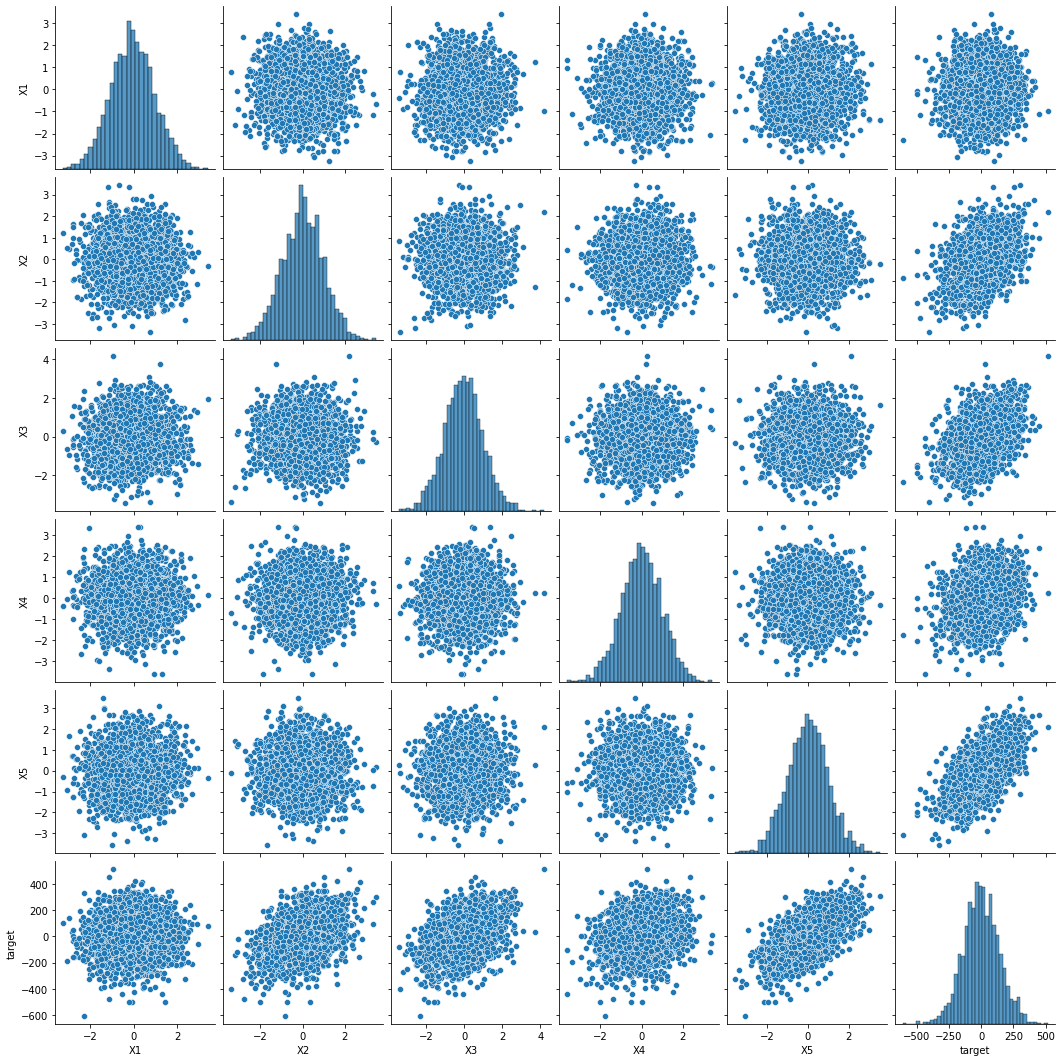

In [6]:
### taking pairplot between the dependent and independent features
sns.pairplot(data)

#### **If linear relationship is not there we do transformations** 

- **for R_S use nth root /log(x)**
- **for L_S use nth power/exp(x)**

### `2. Multicollinearity`

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### taking Vif to check multicollineraity
VIF = pd.Series([variance_inflation_factor(linear_X, i) 
                 for i in range(linear_X.shape[1])], 
                index =linear_feature_names)

In [8]:

VIF

X1    1.002300
X2    1.001609
X3    1.002131
X4    1.000463
X5    1.001597
dtype: float64

- **ideally VIF should be less than 3**

### `3. Homoskedasticity`

In [9]:
residuals=linear_y- pred

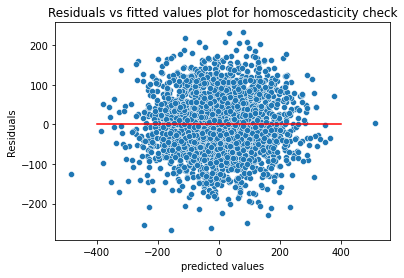

In [10]:
### variance of error terms must be constant
p = sns.scatterplot(pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-400,400],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

### `4. AutoCorrelation`

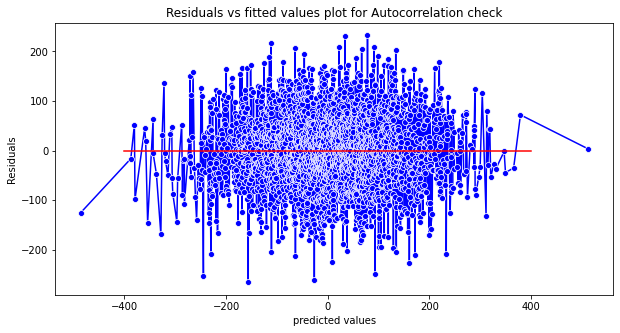

In [11]:
### absence of correlation between error terms
plt.figure(figsize=(10,5))
p = sns.lineplot(pred,residuals,marker='o',color='blue')
plt.xlabel('predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([-400,400],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for Autocorrelation check')

In [12]:
##run durbin watson test to check autocorrelation
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(residuals)
durbinWatson

2.0125719862417695

- **if dw = 2 no autocorrelation** 
- **if dw < 2 + autocorrelation** 
- **if dw > 2 - autocorrelation** 

### `5. Normal Distribution of Errors`

<AxesSubplot:ylabel='Density'>

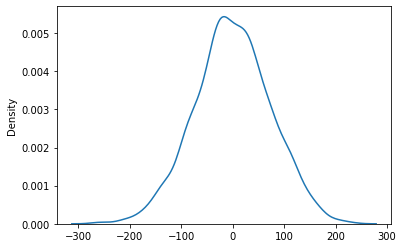

In [13]:
### error terms should be normally distributed
sns.kdeplot(residuals)

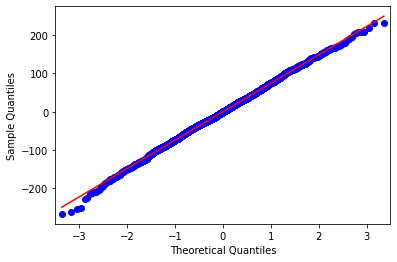

In [14]:
# error terms should overlap with theoritical quantiles on qq plot
sm.qqplot(residuals, line='s') 
plt.show() 

- **if not then scale the data to linear scale using transformation**